In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
print("Get your data set here")
df=pd.read_csv(r"C:\Users\KIIT\OneDrive\P14-Part2-Regression\Section 6 - Simple Linear Regression\Python\Salary_Data.csv")
df.head()
df.shape

Get your data set here


(30, 2)

In [3]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

We are checking whether the salary is linearly dependent on the years of expreience

In [4]:

df.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


We see that that value of correlation between the 2 variables is almost 1,therefore we conclude that simple linear regression would be suitable for predicting the output.

Text(0, 0.5, 'Salary')

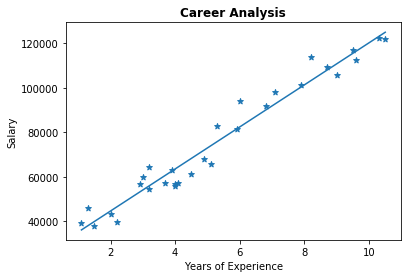

In [5]:
reg=linear_model.LinearRegression()
x=np.array(df['YearsExperience']).reshape(-1,1)
y=np.array(df['Salary']).reshape(-1,1)
lr=reg.fit(x,y)
y_p=reg.predict(x)
plt.scatter(x,y,marker='*')
plt.plot(x,y_p)
plt.title("Career Analysis",fontweight="bold")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
reg.fit(X_train,y_train)
y_p=reg.predict(X_test)

df=pd.DataFrame({'Experience(in yrs)':X_test.flatten(),'PredictedSalary(in rupees)':y_test.flatten()})
df.sort_values('Experience(in yrs)')


,Experience(in yrs),PredictedSalary(in rupees)
0,1.5,37731.0
3,3.9,63218.0
7,4.0,55794.0
2,4.1,57081.0
5,8.7,109431.0
4,9.5,116969.0
6,9.6,112635.0
1,10.3,122391.0


In [7]:
from sklearn.metrics import mean_squared_error
RMSE=sqrt(mean_squared_error(y_test,y_p))
print(RMSE)

4733.70258289858


In [8]:
from sklearn.metrics import r2_score
r2_score(y_test,y_p)

0.9779208335417602

In [9]:
m=reg.coef_
c=reg.intercept_

In [10]:

year=int(input("Enter years of Experience:"))

Enter years of Experience:15


In [11]:
s=m*year+c
s=float(s)
print("YOUR PREDICTED SALARY(in rupees)per month:(According to the given career statistics)")
print(s)

YOUR PREDICTED SALARY(in rupees)per month:(According to the given career statistics)
167682.34869592747
